In [7]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.a2c import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import matplotlib.pyplot as plt
import torch

norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 30
n_features = 4

env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

actor_model = Actor(
    state_dim=batch_dur*n_features+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*n_features+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.0008),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.0005),
    hyprprms={
        'gamma': 0.9995,
    },
    log_freq=1,
    mdl_pth='../models/a2c_nn_3',
    load_models=False,
)

In [ ]:
a2c.run(1000)

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


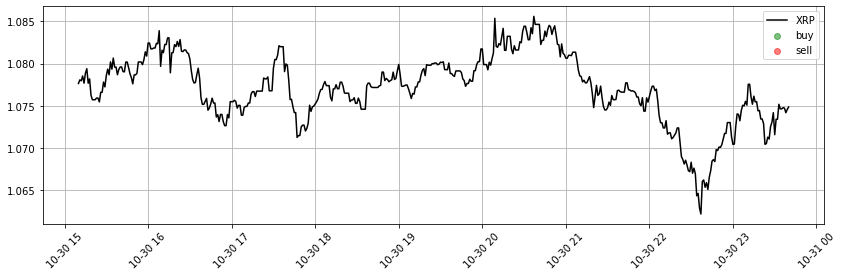

Avg.Rewards: -100.0 | Max.Profit: 0.0 | Avg.Profit: 0.0 | Avg.Units: 0 


In [2]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-10-30 15:15', duration=500, show_pred=False)

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


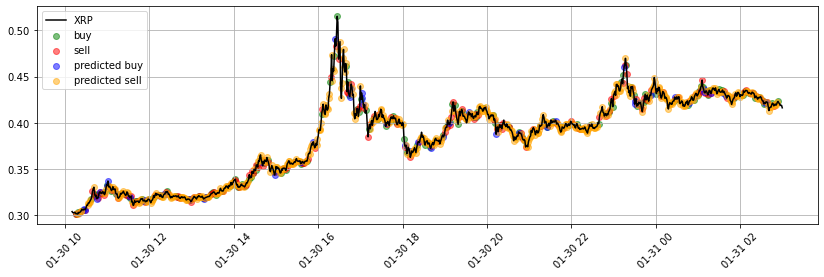

Avg.Rewards: 58.24 | Max.Profit: 8.71 | Avg.Profit: -8.4 | Avg.Units: 61 


In [10]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-01-30 10:15', duration=1000, show_pred=True)

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


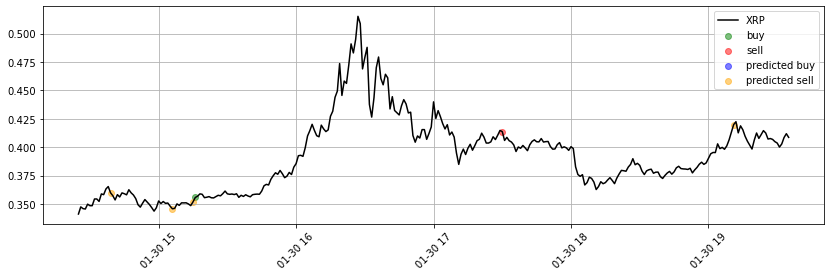

Avg.Rewards: -41.71 | Max.Profit: 44.62 | Avg.Profit: 12.84 | Avg.Units: 125 


In [5]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-01-30 14:30', duration=300, show_pred=True)

## Visualizations

### Training 

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [ ]:
# torch.save(a2c.actor.state_dict(), '../models/a2c_nn_rsi2/actor')
# torch.save(a2c.critic.state_dict(), '../models/a2c_nn_rsi2/critic')

In [ ]:
# import pickle
# with open("../pickles/a2c_logs_final.pickle","wb") as f:
#     temp = dict(a2c.logs)
#     pickle.dump(temp, f, pickle.HIGHEST_PROTOCOL)